# Predicting Real Estate Appraisal Values in Buncombe County, NC

#### As a homeowner, I've often gotten the impression that the residential property appraisal process is a bit lacking in uniformity and accuracy.  No two people, even in the same profession, will have identical philosophies and we all have our own unique cognitive biases. As such, this seems like an area where Machine Learning can play a role in automating the process, as well as potentially making the appraisal value more accurate as opposed to the current process.

#### Since I live in North Carolina, I decided to use Buncome County, NC as a use case.  This is a beautiful area in Western North Carolina, and the county seat, Asheville, is a vibrant city. Random side note: The Hunger Games was filmed just outside of Asheville.  

#### The datset I am using for this project came from the Buncombe County Open Data Explorer.  It is a CSV of their 2019 Residential Building Real Estate Appraisals.  

#### The win condition for this project is for a model to have a MAE less than $30,000

## Library Imports

In [187]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 2000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')


from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.metrics import r2_score, mean_absolute_error

import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Real_Estate_Appraisal_Residential_Building_2019.csv')
df.head()

,PIN,BldgNo,Style,SqFeet,YearBuilt,Grade,Condition,Foundation,RoofType,Hvac,FullBath,HalfBath,AdditionalPlumbingFixtures,Fireplace,SpecialFeature,Bedroom,BasementGarageDoors,IndoorPool,ExtraKitchens,Elevator,BldgValue,OBJECTID
0,060690024200000,1,1 STORY CONVENTIONAL,1796,1964,C,N,PIERS,GABLE W/ COMP. SHGL.,HEAT NO A/C,1,1,0,1,0,3,0,nan,0,nan,152400,1
1,060981652000000,2,1 STORY CONVENTIONAL,400,1920,D,G,PIERS,GABLE W/ COMP. SHGL.,NO CENTRAL SYSTEM,1,0,0,0,0,1,0,nan,0,nan,28800,2
2,060981652000000,1,1 STORY CONVENTIONAL,1938,1920,C,G,PIERS,GABLE W/ COMP. SHGL.,HEAT WITH A/C,2,1,0,1,0,3,0,nan,0,nan,133500,3
3,061540669500000,1,LOG STRUCTURE,2074,2006,C,N,PIERS,GABLE W/ COMP. SHGL.,HEAT WITH A/C,1,1,0,1,0,1,0,nan,0,nan,118400,4
4,061908838100000,1,1.5 CONVENTIONAL,2658,1929,C,N,CONVENTIONAL,HIP W/ COMP. SHGL.,HEAT NO A/C,1,0,0,1,0,3,0,nan,0,nan,128200,5


## Exploratory Analysis

In [3]:
df.shape
# 108700 rows, 22 columns

(108700, 22)

In [4]:
df.head(10)

,PIN,BldgNo,Style,SqFeet,YearBuilt,Grade,Condition,Foundation,RoofType,Hvac,FullBath,HalfBath,AdditionalPlumbingFixtures,Fireplace,SpecialFeature,Bedroom,BasementGarageDoors,IndoorPool,ExtraKitchens,Elevator,BldgValue,OBJECTID
0,060690024200000,1,1 STORY CONVENTIONAL,1796,1964,C,N,PIERS,GABLE W/ COMP. SHGL.,HEAT NO A/C,1,1,0,1,0,3,0,nan,0,nan,152400,1
1,060981652000000,2,1 STORY CONVENTIONAL,400,1920,D,G,PIERS,GABLE W/ COMP. SHGL.,NO CENTRAL SYSTEM,1,0,0,0,0,1,0,nan,0,nan,28800,2
2,060981652000000,1,1 STORY CONVENTIONAL,1938,1920,C,G,PIERS,GABLE W/ COMP. SHGL.,HEAT WITH A/C,2,1,0,1,0,3,0,nan,0,nan,133500,3
3,061540669500000,1,LOG STRUCTURE,2074,2006,C,N,PIERS,GABLE W/ COMP. SHGL.,HEAT WITH A/C,1,1,0,1,0,1,0,nan,0,nan,118400,4
4,061908838100000,1,1.5 CONVENTIONAL,2658,1929,C,N,CONVENTIONAL,HIP W/ COMP. SHGL.,HEAT NO A/C,1,0,0,1,0,3,0,nan,0,nan,128200,5
5,061948825700000,1,1 STORY CONVENTIONAL,1418,1981,C,N,PIERS,GABLE W/ COMP. SHGL.,HEAT NO A/C,2,0,0,0,0,3,0,nan,0,nan,106100,6
6,061979829400000,1,RANCH,2788,1974,C,N,CONVENTIONAL,GABLE W/ COMP. SHGL.,HEAT NO A/C,1,1,0,1,0,3,1,nan,0,nan,149400,7
7,061996206400000,1,1 STORY CONVENTIONAL,1856,1948,C,G,CONVENTIONAL,GABLE W/ COMP. SHGL.,NO CENTRAL SYSTEM,1,0,0,1,0,2,0,nan,0,nan,100300,8
8,062632809300000,1,1.5 CONVENTIONAL,4056,1994,C,N,CONVENTIONAL,GABLE W/ COMP. SHGL.,HEAT WITH A/C,2,0,0,1,0,3,0,nan,0,nan,176200,9
9,063413309300000,1,1 STORY CONVENTIONAL,1152,1953,C,F,PIERS,GABLE W/ COMP. SHGL.,NO CENTRAL SYSTEM,1,0,0,0,0,3,0,nan,0,nan,54700,10


In [5]:
df.tail(10)

,PIN,BldgNo,Style,SqFeet,YearBuilt,Grade,Condition,Foundation,RoofType,Hvac,FullBath,HalfBath,AdditionalPlumbingFixtures,Fireplace,SpecialFeature,Bedroom,BasementGarageDoors,IndoorPool,ExtraKitchens,Elevator,BldgValue,OBJECTID
108690,869657166200000,1,MH CONVERSION,2720,1983,D,N,PIERS,GABLE W/ COMP. SHGL.,HEAT WITH A/C,2,0,0,0,0,2,0,nan,0,nan,123100,108691
108691,869657166200000,1,MH CONVERSION,2720,1983,D,N,PIERS,GABLE W/ COMP. SHGL.,HEAT WITH A/C,2,0,0,0,0,2,0,nan,0,nan,123100,108692
108692,071053567600000,1,1 STORY CONVENTIONAL,3676,1957,C,N,CONVENTIONAL,GABLE W/ COMP. SHGL.,HEAT NO A/C,1,1,0,1,0,3,0,nan,0,nan,176800,108693
108693,974249532900000,3,GARAGE APARTMENT,696,1948,C,N,PIERS,GABLE W/ COMP. SHGL.,HEAT NO A/C,1,0,0,0,0,2,0,nan,0,nan,53800,108694
108694,070124825700000,1,1 STORY CONVENTIONAL,4124,2017,B,N,CONVENTIONAL,GABLE W/ METAL,HEAT WITH A/C,2,1,0,1,1,3,0,nan,0,nan,381900,108695
108695,060994853800000,1,RANCH,1646,1960,C,N,PIERS,GABLE W/ COMP. SHGL.,HEAT WITH A/C,1,1,0,1,0,3,0,nan,0,nan,132400,108696
108696,961748078900000,1,1 STORY CONVENTIONAL,2616,1954,C,N,CONVENTIONAL,GABLE W/ COMP. SHGL.,HEAT NO A/C,1,1,0,1,0,3,0,nan,0,nan,104300,108697
108697,868566025900000,1,1 STORY CONVENTIONAL,4900,2003,C,N,CONVENTIONAL,GABLE W/ COMP. SHGL.,HEAT WITH A/C,2,0,0,0,0,2,1,nan,0,nan,244800,108698
108698,869709904000000,1,1 STORY CONVENTIONAL,1118,1933,D,P,PIERS,HIP W/ COMP. SHGL.,HEAT NO A/C,1,0,0,0,0,2,0,nan,0,nan,16600,108699
108699,974337197000000,1,1.5 CONVENTIONAL,4218,1992,C,N,CONVENTIONAL,GABLE W/ COMP. SHGL.,HEAT WITH A/C,4,0,0,2,0,3,2,nan,0,nan,312800,108700


In [6]:
df.describe()
# IndoorPool and Elevator have a LOT of missing data--will need to do feature engineering on those later

# Max BldgNo is 114!!! What is that?? 

# Max SqFeet is 172983--again, what is that??

# Min YearBuild is 1192 and max is 20185--definitely some errors going on there

# Max FullBath is 22--Ok, it's obvious there is either a multi-family residence or mansion in the dataset

# Max HalfBath is 8--again, very unusual

# Max Fireplace is 65!!!

# Max Bedroom is 35!!!

# Extra kitchens is 16!!

# Lots more elevators in the dataset than I would have thought--max is 21!!!

# Look at that Max BldgValue-- $36.9 million dollars!!!!

# Will most likely need to run some or all of the numerical features through a scaler to get rid of dominant outliers

# The datset doesn't have a data dictionary, so some of these features are a bit ambiguous--will hopefully be more
# clear after EDA and data cleaning is complete


,BldgNo,SqFeet,YearBuilt,FullBath,HalfBath,AdditionalPlumbingFixtures,Fireplace,SpecialFeature,Bedroom,BasementGarageDoors,IndoorPool,ExtraKitchens,Elevator,BldgValue,OBJECTID
count,108700.00,108700.00,108700.00,108700.00,108700.00,108700.00,108700.00,108700.00,108700.00,108700.00,1859.00,108700.00,6327.00,108700.00,108700.00
mean,4.27,2942.35,1973.49,1.87,0.30,0.04,0.69,0.01,2.83,0.27,1.00,0.07,10.41,235488.12,54350.50
std,12.13,4972.92,114.26,0.92,0.50,1.19,1.90,0.13,1.31,0.59,0.00,0.43,6.18,1023973.01,31379.13
min,1.00,0.00,1192.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00
25%,1.00,1608.00,1952.00,1.00,0.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,6.00,109200.00,27175.75
50%,1.00,2488.00,1977.00,2.00,0.00,0.00,1.00,0.00,3.00,0.00,1.00,0.00,10.00,162000.00,54350.50
75%,1.00,3620.00,2000.00,2.00,1.00,0.00,1.00,0.00,3.00,0.00,1.00,0.00,10.00,247100.00,81525.25
max,114.00,172983.00,20185.00,22.00,8.00,43.00,65.00,10.00,35.00,5.00,1.00,16.00,21.00,36913000.00,108700.00


In [11]:
df.describe(include=['object'])

,Style,Grade,Condition,Foundation,RoofType,Hvac
count,108700,108671,108700,108700,108700,108700
unique,32,7,7,4,62,7
top,1 STORY CONVENTIONAL,C,N,CONVENTIONAL,GABLE W/ COMP. SHGL.,HEAT WITH A/C
freq,45471,76617,85943,58179,93544,69517


In [7]:
df.dtypes

# OBJECTID is pointless--can drop it soon

# PIN is a good candidate for the df index

# dtypes appear to be ok

PIN                            object
BldgNo                          int64
Style                          object
SqFeet                          int64
YearBuilt                       int64
Grade                          object
Condition                      object
Foundation                     object
RoofType                       object
Hvac                           object
FullBath                        int64
HalfBath                        int64
AdditionalPlumbingFixtures      int64
Fireplace                       int64
SpecialFeature                  int64
Bedroom                         int64
BasementGarageDoors             int64
IndoorPool                    float64
ExtraKitchens                   int64
Elevator                      float64
BldgValue                       int64
OBJECTID                        int64
dtype: object

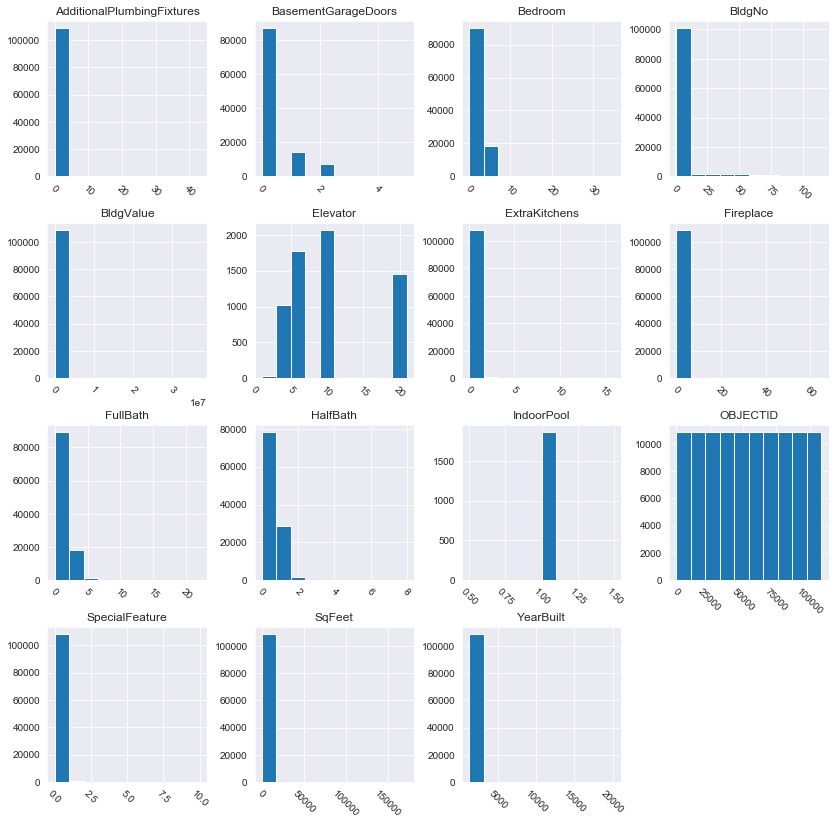

In [8]:
# Distributions

df.hist(figsize=(14, 14), xrot=-45)

plt.show()

# Definitely some issues with sparsity in this dataset

In [9]:
# Make PIN the df index
df.set_index('PIN', inplace=True)

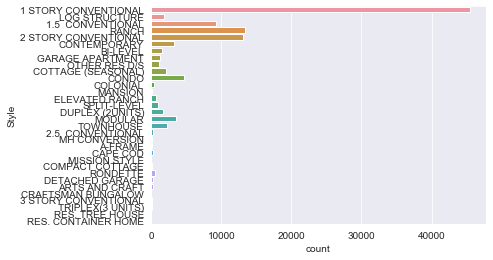

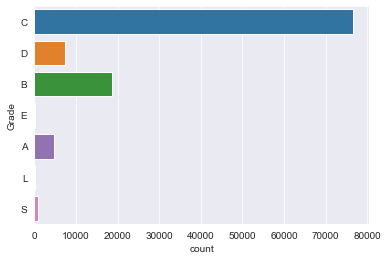

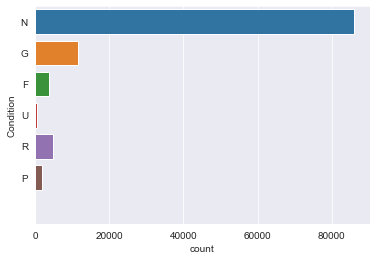

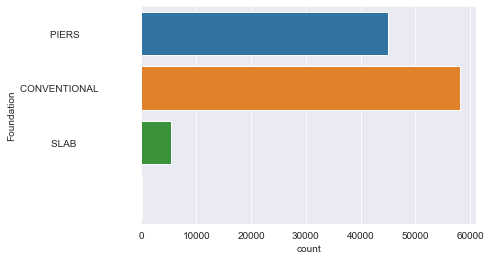

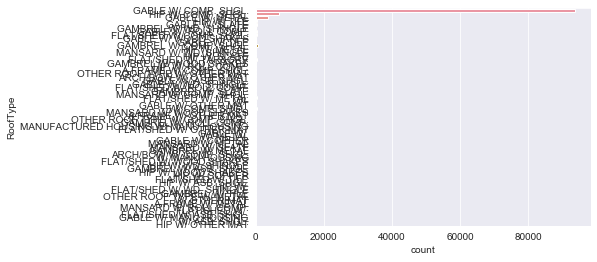

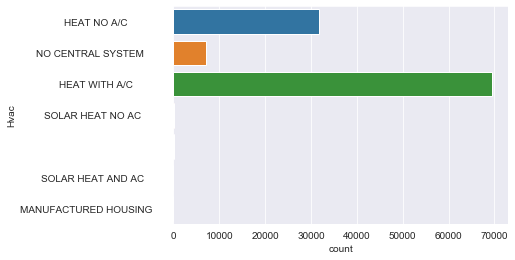

In [10]:
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()
    
    # Lots of sparsity in Style, Grade, RoofType and HVAC
    
    # Need to take a closer look at some of these

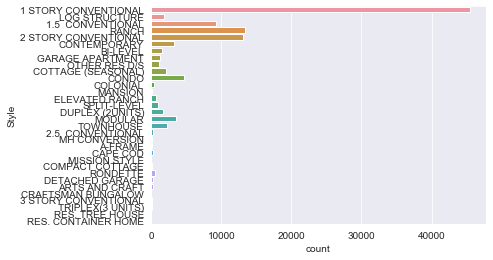

In [12]:
sns.countplot(y='Style', data=df)
plt.show()

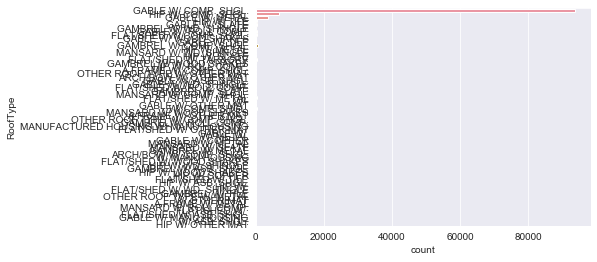

In [13]:
sns.countplot(y='RoofType', data=df)
plt.show()

In [14]:
df.Style.value_counts()

# Will likely drop the duplex and triplex categories--btw, 90 mansions!!

1 STORY CONVENTIONAL    45471
RANCH                   13435
2 STORY CONVENTIONAL    13082
1.5  CONVENTIONAL        9285
CONDO                    4669
MODULAR                  3512
CONTEMPORARY             3211
TOWNHOUSE                2229
COTTAGE (SEASONAL)       2072
LOG STRUCTURE            1821
DUPLEX (2UNITS)          1710
BI-LEVEL                 1510
GARAGE APARTMENT         1303
OTHER RES D/S            1111
SPLIT-LEVEL               988
ELEVATED RANCH            649
RONDETTE                  555
COLONIAL                  411
ARTS AND CRAFT            306
2.5  CONVENTIONAL         249
DETACHED GARAGE           243
CAPE COD                  240
MH CONVERSION             159
A-FRAME                   112
COMPACT COTTAGE           102
MANSION                    90
TRIPLEX(3 UNITS)           72
3 STORY CONVENTIONAL       67
CRAFTSMAN BUNGALOW         29
MISSION STYLE               3
RES. CONTAINER HOME         2
RES. TREE HOUSE             2
Name: Style, dtype: int64

In [16]:
df.RoofType.value_counts()

# May or may not consolidate some of these.  

GABLE W/ COMP. SHGL.                    93544
HIP W/ COMP. SHGL.                       6812
GABLE W/ METAL                           3713
GAMBREL W/ COMP. SHGL.                    607
GABLE W/ ROLL COMP.                       441
FLAT/SHED W/ METAL                        361
GABLE W/ SLATE                            356
HIP W/ TILE                               316
FLAT/SHED W/ COMP. SHGL.                  293
FLAT/SHED W/ TAR&GRV                      286
 W/ COMP. SHGL.                           253
 W/                                       199
GABLE W/ WOOD SHAKES                      191
GABLE W/ TILE                             165
HIP W/ METAL                              154
GABLE W/ WD. SHINGLE                      147
GAMBREL W/ WD. SHINGLE                     90
HIP W/ SLATE                               80
GABLE W/                                   66
GABLE W/ ASB. SHGL.                        64
FLAT/SHED W/ ROLL COMP.                    51
HIP W/ ROLL COMP.                 

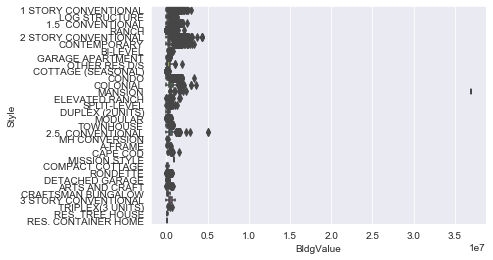

In [17]:
sns.boxplot(y='Style', x='BldgValue', data=df)
plt.show()

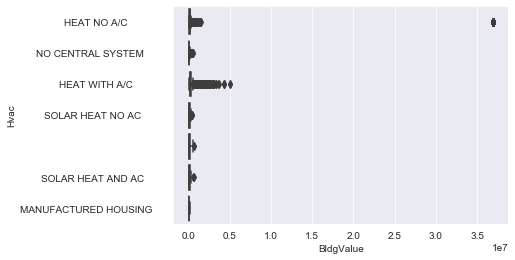

In [18]:
sns.boxplot(y='Hvac', x='BldgValue', data=df)
plt.show()

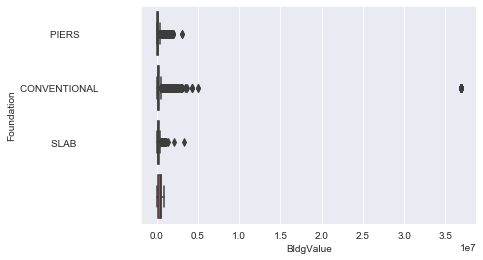

In [19]:
sns.boxplot(y='Foundation', x='BldgValue', data=df)
plt.show()

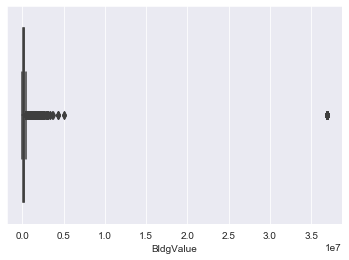

In [20]:
sns.boxplot(df.BldgValue)
plt.show()

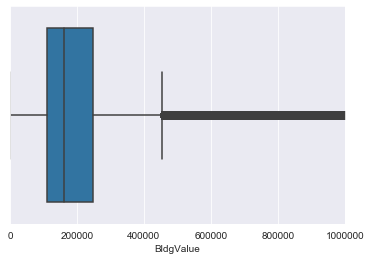

In [21]:
sns.boxplot(df.BldgValue)
plt.xlim(0, 1000000)
plt.show()

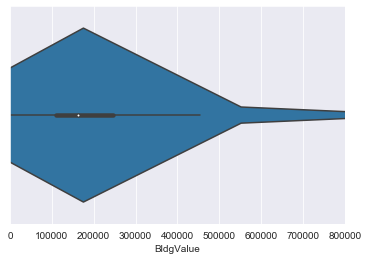

In [23]:
sns.violinplot('BldgValue', data=df)
plt.xlim(0, 800000)
plt.show()

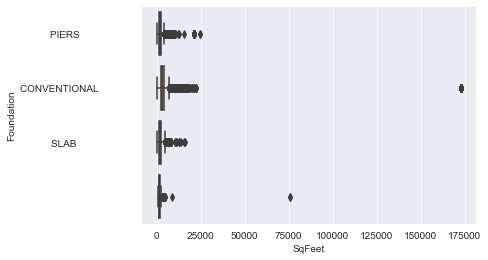

In [24]:
sns.boxplot(y='Foundation', x='SqFeet', data=df)
plt.show()

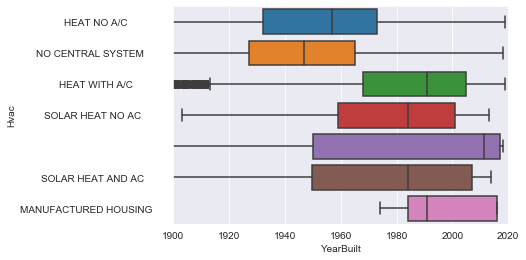

In [27]:
sns.boxplot(y='Hvac', x='YearBuilt', data=df)
plt.xlim(1900, 2020)
plt.show()

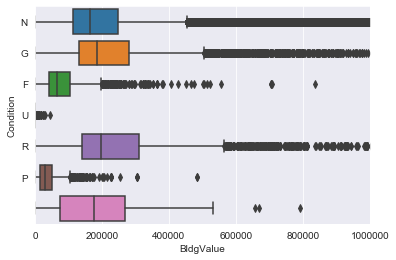

In [30]:
sns.boxplot(y='Condition', x='BldgValue', data=df)
plt.xlim(0, 1000000)
plt.show()

In [31]:
df.groupby('Style').agg(['mean', 'std']).T

Style                            1 STORY CONVENTIONAL  1.5  CONVENTIONAL  \
BldgNo                     mean                  3.95               3.60   
                           std                  11.73               8.89   
SqFeet                     mean               2298.27            3336.47   
                           std                1241.75            1596.10   
YearBuilt                  mean               1965.38            1972.33   
                           std                 150.04              39.39   
FullBath                   mean                  1.54               2.10   
                           std                   0.69               0.85   
HalfBath                   mean                  0.17               0.44   
                           std                   0.39               0.54   
AdditionalPlumbingFixtures mean                  0.01               0.02   
                           std                   0.09               0.17   
Fireplace                  mean                  0.48               0.78   
                           std                   0.58               0.65   
SpecialFeature             mean                  0.00               0.01   
                           std                   0.09               0.15   
Bedroom                    mean                  2.60               3.08   
                           std                   0.77               0.85   
BasementGarageDoors        mean                  0.22               0.25   
                           std                   0.51               0.58   
IndoorPool                 mean                  1.00               1.00   
                           std                   0.00               0.00   
ExtraKitchens              mean                  0.02               0.05   
                           std                   0.16               0.28   
Elevator                   mean                 10.34               6.75   
                           std                   7.01               2.78   
BldgValue                  mean             151891.05          254916.10   
                           std              120541.16          178231.52   
OBJECTID                   mean              54366.76           50955.18   
                           std               31597.31           32224.26   

Style                            2 STORY CONVENTIONAL  2.5  CONVENTIONAL  \
BldgNo                     mean                  2.77               1.05   
                           std                   8.58               0.21   
SqFeet                     mean               3934.89            5716.92   
                           std                2071.71            2848.04   
YearBuilt                  mean               1974.25            1942.14   
                           std                  39.22              42.71   
FullBath                   mean                  2.47               4.10   
                           std                   1.08               2.61   
HalfBath                   mean                  0.65               0.63   
                           std                   0.57               0.69   
AdditionalPlumbingFixtures mean                  0.03               0.03   
                           std                   0.22               0.17   
Fireplace                  mean                  0.97               1.33   
                           std                   0.91               1.34   
SpecialFeature             mean                  0.02               0.04   
                           std                   0.24               0.30   
Bedroom                    mean                  3.40               3.41   
                           std                   0.97               1.88   
BasementGarageDoors        mean                  0.19               0.14   
                           std                   0.52               0.47   
IndoorPool                 mean                

In [32]:
df.groupby('RoofType').agg(['mean', 'std']).T

RoofType                              W/    W/ ASB. SHGL.   W/ COMP. SHGL.  \
BldgNo                     mean      1.32            1.00             1.11   
                           std       0.99             nan             0.36   
SqFeet                     mean   2649.91         3212.00          2890.60   
                           std    7591.53             nan          1441.00   
YearBuilt                  mean   2006.78         2018.00          2086.75   
                           std      30.21             nan          1142.42   
FullBath                   mean      1.98            2.00             2.15   
                           std       1.95             nan             0.72   
HalfBath                   mean      0.21            1.00             0.39   
                           std       0.70             nan             0.51   
AdditionalPlumbingFixtures mean      0.00            0.00             0.01   
                           std       0.00             nan             0.11   
Fireplace                  mean      0.14            1.00             0.72   
                           std       0.38             nan             0.61   
SpecialFeature             mean      0.00            0.00             0.00   
                           std       0.00             nan             0.00   
Bedroom                    mean      1.90            4.00             2.81   
                           std       1.17             nan             1.02   
BasementGarageDoors        mean      0.04            0.00             0.15   
                           std       0.24             nan             0.50   
IndoorPool                 mean       nan             nan              nan   
                           std        nan             nan              nan   
ExtraKitchens              mean      0.11            0.00             0.00   
                           std       0.52             nan             0.06   
Elevator                   mean      2.00             nan              nan   
                           std       0.00             nan              nan   
BldgValue                  mean 328110.55       394100.00        240127.27   
                           std  310619.06             nan        135979.94   
OBJECTID                   mean  48721.35        96880.00         51353.01   
                           std   30643.59             nan         28625.25   

RoofType                          W/ MANU HOUSING   W/ METAL   W/ OTHER MAT  \
BldgNo                     mean              1.17       1.38           1.00   
                           std               0.41       0.80            nan   
SqFeet                     mean           1136.00    2620.12        4050.00   
                           std             246.00    2079.66            nan   
YearBuilt                  mean           2003.67    2017.46        2018.00   
                           std              11.47       1.77            nan   
FullBath                   mean              0.00       1.73           2.00   
                           std               0.00       1.12            nan   
HalfBath                   mean              0.00       0.42           1.00   
                           std               0.00       0.50            nan   
AdditionalPlumbingFixtures mean              0.00       0.00           0.00   
                           std               0.00       0.00            nan   
Fireplace                  mean              0.00       0.58           1.00   
                           std               0.00       0.50            nan   
SpecialFeature             mean              0.00       0.00           0.00   
                           std               0.00       0.00            nan   
Bedroom                    mean              0.00       2.19           1.00   
                           std               0.00       1.41            nan   
BasementGarageDoors        mean              0.00       0.04           0.00   
 

In [33]:
df.groupby('Foundation').agg(['mean', 'std']).T

Foundation                                 CONVENTIONAL               \
BldgNo                     mean      1.55                       2.44   
                           std       1.87                       7.10   
SqFeet                     mean   2846.60                    3763.48   
                           std    9649.27                    6578.42   
YearBuilt                  mean   2013.40                    1970.74   
                           std      11.72                      81.04   
FullBath                   mean      1.82                       2.03   
                           std       1.60                       0.97   
HalfBath                   mean      0.16                       0.37   
                           std       0.81                       0.53   
AdditionalPlumbingFixtures mean      0.00                       0.07   
                           std       0.00                       1.62   
Fireplace                  mean      0.03                       0.89   
                           std       0.18                       2.52   
SpecialFeature             mean      0.00                       0.01   
                           std       0.00                       0.15   
Bedroom                    mean      1.65                       3.04   
                           std       1.04                       1.51   
BasementGarageDoors        mean      0.07                       0.51   
                           std       0.41                       0.73   
IndoorPool                 mean       nan                       1.00   
                           std        nan                       0.00   
ExtraKitchens              mean      0.02                       0.07   
                           std       0.13                       0.42   
Elevator                   mean      2.00                       9.56   
                           std       0.00                       6.36   
BldgValue                  mean 408438.66                  292173.60   
                           std  201672.67                 1391035.96   
OBJECTID                   mean  48558.76                   53562.63   
                           std   33897.33                   31641.92   

Foundation                       PIERS                      \
BldgNo                     mean                       6.57   
                           std                       15.99   
SqFeet                     mean                    1983.09   
                           std                     1225.84   
YearBuilt                  mean                    1974.11   
                           std                      151.21   
FullBath                   mean                       1.67   
                           std                        0.81   
HalfBath                   mean                       0.21   
                           std                        0.43   
AdditionalPlumbingFixtures mean                       0.01   
                           std                        0.11   
Fireplace                  mean                       0.46   
                           std                        0.58   
SpecialFeature             mean                       0.00   
                           std                        0.09   
Bedroom                    mean                       2.60   
                           std                        0.93   
BasementGarageDoors        mean                       0.01   
                           std                        0.10   
IndoorPool                 mean                       1.00   
                           std                        0.00   
ExtraKitchens              mean                       0.06   
                           std                        0.46   
Elevator                   mean                      10.89   
                           std                        6.05   
BldgValue                  mean                  165452.31   
                           std 

In [34]:
df.groupby('Condition').agg(['mean', 'std']).T

Condition                                        F         G          N  \
BldgNo                     mean      1.39     2.51      4.11       4.56   
                           std       1.37     8.81      9.15      12.92   
SqFeet                     mean   2839.81  2159.55   2856.84    3029.24   
                           std    1884.97  1236.39   1606.42    5527.48   
YearBuilt                  mean   2015.42  1949.34   1949.57    1980.10   
                           std      13.53    24.12     30.42     126.81   
FullBath                   mean      2.02     1.43      1.85       1.91   
                           std       0.94     0.85      0.96       0.91   
HalfBath                   mean      0.39     0.14      0.33       0.31   
                           std       0.51     0.36      0.50       0.50   
AdditionalPlumbingFixtures mean      0.00     0.00      0.01       0.05   
                           std       0.00     0.05      0.09       1.33   
Fireplace                  mean      0.67     0.42      0.79       0.70   
                           std       0.89     0.59      0.80       2.10   
SpecialFeature             mean      0.01     0.00      0.01       0.01   
                           std       0.10     0.02      0.16       0.12   
Bedroom                    mean      1.81     2.59      2.90       2.84   
                           std       1.52     0.89      0.89       1.39   
BasementGarageDoors        mean      0.13     0.19      0.25       0.29   
                           std       0.42     0.48      0.57       0.60   
IndoorPool                 mean       nan     1.00      1.00       1.00   
                           std        nan     0.00      0.00       0.00   
ExtraKitchens              mean      0.04     0.09      0.06       0.07   
                           std       0.20     0.61      0.35       0.44   
Elevator                   mean       nan    10.00      5.99      11.90   
                           std        nan     0.00      0.14       6.56   
BldgValue                  mean 210934.02 80647.96 243620.03  244864.28   
                           std  213814.20 60888.59 192442.23 1146617.56   
OBJECTID                   mean  56391.02 53750.31  48383.60   55259.05   
                           std   31148.98 32666.12  33262.41   30893.90   

Condition                              P         R        U  
BldgNo                     mean     3.13      1.50     2.79  
                           std     10.93      3.36     7.15  
SqFeet                     mean  1725.81   2836.14  1575.05  
                           std   1220.77   1784.21  1425.73  
YearBuilt                  mean  1945.02   1946.52  1937.52  
                           std     24.73     29.55    21.88  
FullBath                   mean     1.16      1.96     1.21  
                           std      0.56      0.97     0.73  
HalfBath                   mean     0.08      0.27     0.03  
                           std      0.31      0.50     0.17  
AdditionalPlumbingFixtures mean     0.01      0.02     0.00  
                           std      0.10      0.17     0.00  
Fireplace                  mean     0.25      0.80     0.23  
                           std      0.48      0.86     0.46  
SpecialFeature             mean     0.00      0.02     0.00  
                           std      0.00      0.21     0.00  
Bedroom                    mean     2.36      2.86     2.16  
                           std      1.01      0.92     0.97  
BasementGarageDoors        mean     0.10      0.24     0.10  
                           std      0.36      0.57     0.41  
IndoorPool                 mean     1.00      1.00     1.00  
                           std      0.00      0.00     0.00  
ExtraKitchens              mean     0.02      0.05     0.04  
                           std      0.22      0.23     0.46  
Elevator                   mean    10.00      6.00      nan  
                           std      0.00      0.00      nan  


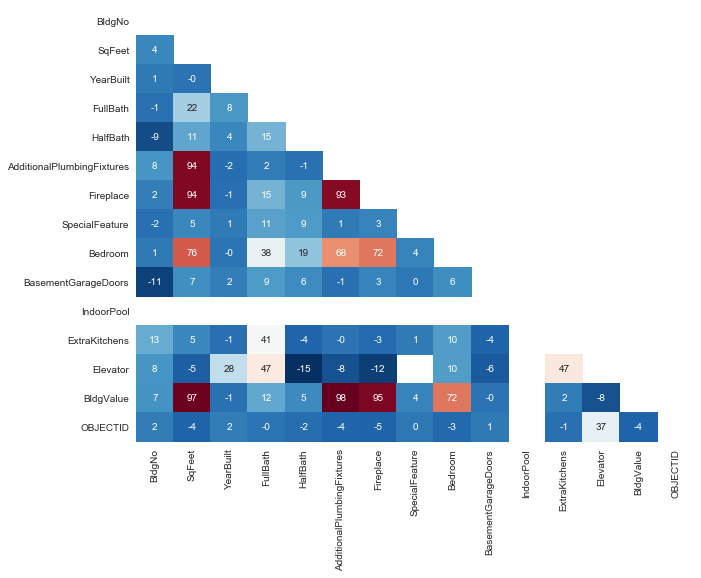

In [35]:
correlations = df.corr()

sns.set_style('white')

plt.figure(figsize=(10, 8))

mask = np.zeros_like(correlations)

mask[np.triu_indices_from(mask)] = 1


sns.heatmap(correlations * 100,
           cmap='RdBu_r',
           annot=True,
           fmt='.0f',
           mask=mask,
           cbar=False)

plt.show()

#### There is a lot of data cleaning to do before the dataset is ready for modeling.  Will need to do some feature engineering on IndoorPool, YearBuilt, Condition, Foundation.  Nothing surprising from the correlation matrix.

## Data Cleaning

In [36]:
print(df.shape)

df = df.drop_duplicates()

df.drop('OBJECTID', axis=1, inplace=True)

print(df.shape)

(108700, 21)
(108700, 20)


#### No duplicates dropped -- got rid of OBJECTID

In [37]:
df.isna().sum()

BldgNo                             0
Style                              0
SqFeet                             0
YearBuilt                          0
Grade                             29
Condition                          0
Foundation                         0
RoofType                           0
Hvac                               0
FullBath                           0
HalfBath                           0
AdditionalPlumbingFixtures         0
Fireplace                          0
SpecialFeature                     0
Bedroom                            0
BasementGarageDoors                0
IndoorPool                    106841
ExtraKitchens                      0
Elevator                      102373
BldgValue                          0
dtype: int64

In [38]:
df.YearBuilt.value_counts()

# 20018 is a mistake
# 20107 is a mistake
# 1192 has to be a mistake--there are some REALLY OLD homes in this dataset, but no way anything from 1192!
# 20185

2006     3400
1980     2563
2000     2382
2004     2238
2007     2107
1925     1897
2008     1797
2017     1791
2005     1781
2002     1681
1960     1674
1920     1666
1965     1659
1999     1637
1927     1564
1970     1550
1950     1511
2003     1484
1986     1464
1964     1458
2018     1453
1930     1444
1978     1318
2016     1316
2014     1314
1998     1297
1989     1290
1900     1271
1995     1260
2001     1257
1955     1230
1940     1229
2015     1218
1985     1190
1977     1182
1973     1163
1962     1160
1987     1158
1996     1141
1972     1114
1984     1102
1997     1090
1990     1080
1961     1069
1963     1068
1993     1061
1956     1047
1967     1046
1988     1015
1968     1010
1976     1009
1949      998
1974      941
1992      936
1954      920
1981      919
1975      911
1948      901
1928      893
1983      884
1994      862
1969      850
1966      838
2013      834
2009      824
1953      814
1952      808
1991      805
1971      804
1951      789
1982      789
1959  

In [43]:
df = df[~(df['YearBuilt'] == '20018')]

In [47]:
df = df[~(df['YearBuilt'] == 20107)]

In [49]:
df = df[~(df['YearBuilt'] == 20185)]

In [51]:
df = df[~(df['YearBuilt'] == 1192)]

In [52]:
df.YearBuilt.value_counts()

2006    3400
1980    2563
2000    2382
2004    2238
2007    2107
1925    1897
2008    1797
2017    1791
2005    1781
2002    1681
1960    1674
1920    1666
1965    1659
1999    1637
1927    1564
1970    1550
1950    1511
2003    1484
1986    1464
1964    1458
2018    1453
1930    1444
1978    1318
2016    1316
2014    1314
1998    1297
1989    1290
1900    1271
1995    1260
2001    1257
1955    1230
1940    1229
2015    1218
1985    1190
1977    1182
1973    1163
1962    1160
1987    1158
1996    1141
1972    1114
1984    1102
1997    1090
1990    1080
1961    1069
1963    1068
1993    1061
1956    1047
1967    1046
1988    1015
1968    1010
1976    1009
1949     998
1974     941
1992     936
1954     920
1981     919
1975     911
1948     901
1928     893
1983     884
1994     862
1969     850
1966     838
2013     834
2009     824
1953     814
1952     808
1991     805
1971     804
1951     789
1982     789
1959     785
1979     770
1947     747
1926     706
1958     699
2010     684

In [65]:
df.YearBuilt.describe()

count   103238.00
mean      1971.60
std         31.34
min       1760.00
25%       1950.00
50%       1976.00
75%       1999.00
max       2019.00
Name: YearBuilt, dtype: float64

##### Year looks much better with the questionable values removed

In [53]:
df.Style.value_counts()

1 STORY CONVENTIONAL    45468
RANCH                   13435
2 STORY CONVENTIONAL    13082
1.5  CONVENTIONAL        9284
CONDO                    4669
MODULAR                  3512
CONTEMPORARY             3211
TOWNHOUSE                2228
COTTAGE (SEASONAL)       2072
LOG STRUCTURE            1821
DUPLEX (2UNITS)          1710
BI-LEVEL                 1510
GARAGE APARTMENT         1303
OTHER RES D/S            1111
SPLIT-LEVEL               988
ELEVATED RANCH            649
RONDETTE                  555
COLONIAL                  411
ARTS AND CRAFT            306
2.5  CONVENTIONAL         249
DETACHED GARAGE           243
CAPE COD                  240
MH CONVERSION             159
A-FRAME                   112
COMPACT COTTAGE           102
MANSION                    90
TRIPLEX(3 UNITS)           72
3 STORY CONVENTIONAL       67
CRAFTSMAN BUNGALOW         29
MISSION STYLE               3
RES. CONTAINER HOME         2
RES. TREE HOUSE             2
Name: Style, dtype: int64

In [54]:
df = df[~(df.Style == 'RES. TREE HOUSE')]

In [55]:
df = df[~(df['Style'] == 'TRIPLEX(3 UNITS)')]

In [56]:
df = df[~(df['Style'] == 'MH CONVERSION')]

In [57]:
df = df[~(df['Style'] == 'RES. TREE HOUSE')]

In [58]:
df = df[~(df['Style'] == 'RES. CONTAINER HOME')]

In [59]:
df = df[~(df['Style'] == 'MODULAR')]

In [61]:
df = df[~(df['Style'] == 'DUPLEX (2UNITS)')]

In [62]:
df.Style.value_counts()

1 STORY CONVENTIONAL    45468
RANCH                   13435
2 STORY CONVENTIONAL    13082
1.5  CONVENTIONAL        9284
CONDO                    4669
CONTEMPORARY             3211
TOWNHOUSE                2228
COTTAGE (SEASONAL)       2072
LOG STRUCTURE            1821
BI-LEVEL                 1510
GARAGE APARTMENT         1303
OTHER RES D/S            1111
SPLIT-LEVEL               988
ELEVATED RANCH            649
RONDETTE                  555
COLONIAL                  411
ARTS AND CRAFT            306
2.5  CONVENTIONAL         249
DETACHED GARAGE           243
CAPE COD                  240
A-FRAME                   112
COMPACT COTTAGE           102
MANSION                    90
3 STORY CONVENTIONAL       67
CRAFTSMAN BUNGALOW         29
MISSION STYLE               3
Name: Style, dtype: int64

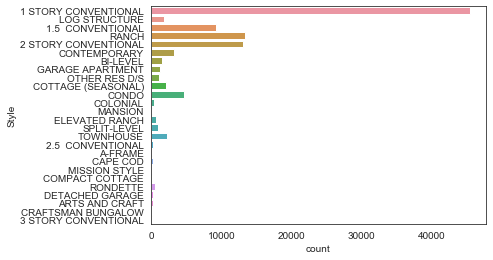

In [63]:
sns.countplot(y='Style', data=df)
plt.show()

### Style looks much better after removing some of the undesired categories

In [66]:
df.Grade.value_counts()

C    71737
B    18161
D     7292
A     4805
S      761
E      245
L      214
Name: Grade, dtype: int64

### Grade looks good, no need to remove any categories

In [67]:
df.Condition.value_counts()

N    80815
G    11459
R     4842
F     3619
P     1921
U      491
        91
Name: Condition, dtype: int64

In [68]:
df.Condition.replace(' ', 'UNKNOWN', inplace=True)

In [69]:
df.Condition.value_counts()

N          80815
G          11459
R           4842
F           3619
P           1921
U            491
UNKNOWN       91
Name: Condition, dtype: int64

### Condition looks good now

In [70]:
df.Foundation.value_counts()

CONVENTIONAL                 56353
PIERS                        41784
SLAB                          4993
                               108
Name: Foundation, dtype: int64

In [72]:
df.Foundation.replace(' ', 'UNKNOWN', inplace=True)

In [73]:
df.Foundation.value_counts()

CONVENTIONAL                 56353
PIERS                        41784
SLAB                          4993
UNKNOWN                        108
Name: Foundation, dtype: int64

### Foundation is cleaned up and ready to go

For now, I'm going to leave the RoofType alone.  That may change, but for now will press on.

In [74]:
df.Hvac.value_counts()

HEAT WITH A/C                64619
HEAT NO A/C                  31358
NO CENTRAL SYSTEM             6997
                               119
SOLAR HEAT NO AC               104
SOLAR HEAT AND AC               38
MANUFACTURED HOUSING             3
Name: Hvac, dtype: int64

In [75]:
df.Hvac.replace(' ', 'UNKNOWN', inplace=True)

In [76]:
df.Hvac.value_counts()

HEAT WITH A/C                64619
HEAT NO A/C                  31358
NO CENTRAL SYSTEM             6997
UNKNOWN                        119
SOLAR HEAT NO AC               104
SOLAR HEAT AND AC               38
MANUFACTURED HOUSING             3
Name: Hvac, dtype: int64

#### HVAC looks good now

In [77]:
df.SqFeet.describe()

count   103238.00
mean      2943.69
std       5091.02
min          0.00
25%       1592.00
50%       2488.00
75%       3613.00
max     172983.00
Name: SqFeet, dtype: float64

In [79]:
df = df[df['SqFeet'] > 0]

In [80]:
df.SqFeet.describe()

count   103129.00
mean      2946.81
std       5092.81
min         80.00
25%       1594.00
50%       2490.00
75%       3614.00
max     172983.00
Name: SqFeet, dtype: float64

In [81]:
df.FullBath.describe()

count   103129.00
mean         1.85
std          0.92
min          0.00
25%          1.00
50%          2.00
75%          2.00
max         22.00
Name: FullBath, dtype: float64

In [82]:
df = df[df['FullBath'] > 0]

In [83]:
df.FullBath.describe()

count   102576.00
mean         1.86
std          0.91
min          1.00
25%          1.00
50%          2.00
75%          2.00
max         22.00
Name: FullBath, dtype: float64

In [84]:
df.HalfBath.describe()

count   102576.00
mean         0.30
std          0.49
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          8.00
Name: HalfBath, dtype: float64

In [86]:
df.Fireplace.describe()

count   102576.00
mean         0.72
std          1.95
min          0.00
25%          0.00
50%          1.00
75%          1.00
max         65.00
Name: Fireplace, dtype: float64

In [87]:
df.AdditionalPlumbingFixtures.describe()

count   102576.00
mean         0.05
std          1.22
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         43.00
Name: AdditionalPlumbingFixtures, dtype: float64

In [88]:
df.SpecialFeature.describe()

count   102576.00
mean         0.01
std          0.13
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         10.00
Name: SpecialFeature, dtype: float64

In [89]:
df.Bedroom.describe()

count   102576.00
mean         2.82
std          1.31
min          0.00
25%          2.00
50%          3.00
75%          3.00
max         35.00
Name: Bedroom, dtype: float64

In [90]:
df = df[df['Bedroom'] > 0]

In [91]:
df.Bedroom.describe()

count   101257.00
mean         2.86
std          1.28
min          1.00
25%          2.00
50%          3.00
75%          3.00
max         35.00
Name: Bedroom, dtype: float64

In [92]:
df.BasementGarageDoors.describe()

count   101257.00
mean         0.28
std          0.59
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          5.00
Name: BasementGarageDoors, dtype: float64

In [93]:
df.IndoorPool.describe()

count   1858.00
mean       1.00
std        0.00
min        1.00
25%        1.00
50%        1.00
75%        1.00
max        1.00
Name: IndoorPool, dtype: float64

#### IndoorPool is mostly NA, but I will impute that with a column transformer during the modeling process

In [94]:
df.ExtraKitchens.describe()

count   101257.00
mean         0.05
std          0.41
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         16.00
Name: ExtraKitchens, dtype: float64

In [95]:
df.Elevator.describe()

count   5415.00
mean       9.78
std        5.61
min        1.00
25%        6.00
50%       10.00
75%       10.00
max       21.00
Name: Elevator, dtype: float64

#### Elevator is also mostly missing, but will impute with column transformer during modeling process

In [96]:
df.BldgValue.describe()

count     101257.00
mean      239041.33
std      1060378.60
min            0.00
25%       108500.00
50%       161700.00
75%       248500.00
max     36913000.00
Name: BldgValue, dtype: float64

In [97]:
df = df[df['BldgValue'] > 0]

In [98]:
df.BldgValue.describe()

count     100365.00
mean      241165.82
std      1064839.76
min          100.00
25%       110100.00
50%       162800.00
75%       249900.00
max     36913000.00
Name: BldgValue, dtype: float64

With all of the data cleaning, I will repeat another iteration of evaluating the summary statistics and value counts

In [99]:
df.shape

(100365, 20)

In [100]:
df.describe()

,BldgNo,SqFeet,YearBuilt,FullBath,HalfBath,AdditionalPlumbingFixtures,Fireplace,SpecialFeature,Bedroom,BasementGarageDoors,IndoorPool,ExtraKitchens,Elevator,BldgValue
count,100365.00,100365.00,100365.00,100365.00,100365.00,100365.00,100365.00,100365.00,100365.00,100365.00,1856.00,100365.00,5415.00,100365.00
mean,4.10,2967.19,1971.40,1.86,0.31,0.05,0.73,0.01,2.86,0.28,1.00,0.05,9.78,241165.82
std,11.98,5136.51,31.12,0.91,0.50,1.23,1.97,0.13,1.28,0.60,0.00,0.41,5.61,1064839.76
min,1.00,80.00,1760.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,100.00
25%,1.00,1624.00,1950.00,1.00,0.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,6.00,110100.00
50%,1.00,2516.00,1975.00,2.00,0.00,0.00,1.00,0.00,3.00,0.00,1.00,0.00,10.00,162800.00
75%,1.00,3630.00,1999.00,2.00,1.00,0.00,1.00,0.00,3.00,0.00,1.00,0.00,10.00,249900.00
max,114.00,172983.00,2019.00,22.00,4.00,43.00,65.00,10.00,35.00,5.00,1.00,16.00,21.00,36913000.00


In [101]:
df.describe(include=['object'])

,Style,Grade,Condition,Foundation,RoofType,Hvac
count,100365,100343,100365,100365,100365,100365
unique,26,7,7,4,60,6
top,1 STORY CONVENTIONAL,C,N,CONVENTIONAL,GABLE W/ COMP. SHGL.,HEAT WITH A/C
freq,44641,70268,78664,55362,86240,63360


In [110]:
df.dtypes

BldgNo                          int64
Style                          object
SqFeet                          int64
YearBuilt                       int64
Grade                          object
Condition                      object
Foundation                     object
RoofType                       object
Hvac                           object
FullBath                        int64
HalfBath                        int64
AdditionalPlumbingFixtures      int64
Fireplace                       int64
SpecialFeature                  int64
Bedroom                         int64
BasementGarageDoors             int64
IndoorPool                    float64
ExtraKitchens                   int64
Elevator                      float64
BldgValue                       int64
PropertyAge                     int64
dtype: object

In [111]:
df.isna().sum()

BldgNo                            0
Style                             0
SqFeet                            0
YearBuilt                         0
Grade                            22
Condition                         0
Foundation                        0
RoofType                          0
Hvac                              0
FullBath                          0
HalfBath                          0
AdditionalPlumbingFixtures        0
Fireplace                         0
SpecialFeature                    0
Bedroom                           0
BasementGarageDoors               0
IndoorPool                    98509
ExtraKitchens                     0
Elevator                      94950
BldgValue                         0
PropertyAge                       0
dtype: int64

In [102]:
df.Style.value_counts()

1 STORY CONVENTIONAL    44641
RANCH                   13314
2 STORY CONVENTIONAL    12837
1.5  CONVENTIONAL        9096
CONDO                    4636
CONTEMPORARY             3193
TOWNHOUSE                2207
LOG STRUCTURE            1785
COTTAGE (SEASONAL)       1738
BI-LEVEL                 1510
GARAGE APARTMENT         1165
SPLIT-LEVEL               987
OTHER RES D/S             735
ELEVATED RANCH            648
COLONIAL                  406
ARTS AND CRAFT            301
RONDETTE                  300
2.5  CONVENTIONAL         243
CAPE COD                  240
A-FRAME                   107
MANSION                    90
COMPACT COTTAGE            89
3 STORY CONVENTIONAL       62
CRAFTSMAN BUNGALOW         29
DETACHED GARAGE             3
MISSION STYLE               3
Name: Style, dtype: int64

In [103]:
df.RoofType.value_counts()

GABLE W/ COMP. SHGL.                    86240
HIP W/ COMP. SHGL.                       6384
GABLE W/ METAL                           3473
GAMBREL W/ COMP. SHGL.                    582
GABLE W/ ROLL COMP.                       407
GABLE W/ SLATE                            350
FLAT/SHED W/ METAL                        316
HIP W/ TILE                               313
FLAT/SHED W/ COMP. SHGL.                  279
FLAT/SHED W/ TAR&GRV                      264
 W/ COMP. SHGL.                           216
GABLE W/ WOOD SHAKES                      185
GABLE W/ TILE                             161
 W/                                       150
GABLE W/ WD. SHINGLE                      145
HIP W/ METAL                              142
GAMBREL W/ WD. SHINGLE                     90
HIP W/ SLATE                               79
GABLE W/ ASB. SHGL.                        61
FLAT/SHED W/ ROLL COMP.                    47
OTHER ROOF TYPE W/ OTHER MAT               45
GABLE W/                          

## Feature Engineering

In [104]:
df['PropertyAge'] = 2020 - df.YearBuilt

In [105]:
df.PropertyAge.describe()

count   100365.00
mean        48.60
std         31.12
min          1.00
25%         21.00
50%         45.00
75%         70.00
max        260.00
Name: PropertyAge, dtype: float64

## Algorithm Selection

In [108]:
lasso = Lasso(random_state=1234)

ridge = Ridge(random_state=1234)

enet = ElasticNet(random_state=1234)

dt = DecisionTreeRegressor(random_state=1234)

rf = RandomForestRegressor(random_state=1234)

gb = GradientBoostingRegressor(random_state=1234)

In [139]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [114]:
imp_c_num = SimpleImputer(strategy='constant', fill_value=0)

In [115]:
imp_c_obj = SimpleImputer(strategy='constant', fill_value='Missing')

## Model Training

In [116]:
y = df.BldgValue

X = df.drop('BldgValue', axis=1)

In [117]:
print(y.shape)
print(X.shape)

(100365,)
(100365, 20)


In [118]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80292, 20)
(20073, 20)
(80292,)
(20073,)


In [140]:
imp_ohe = make_pipeline(imp_c_obj, ohe)

In [141]:
ct = make_column_transformer(
    (imp_ohe, ['Grade']),
    (ohe, ['Style', 'Condition', 'Foundation', 'RoofType', 'Hvac']),
    (imp_c_num, ['IndoorPool', 'Elevator']),
    remainder ='passthrough'
)

In [129]:
lasso_params = {}
lasso_params['lasso__alpha'] = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]

In [130]:
ridge_params = {}
ridge_params['ridge__alpha'] =  [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]

In [131]:
enet_params = {}
enet_params['elasticnet__alpha'] =  [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
enet_params['elasticnet__l1_ratio'] = [0.1, 0.3, 0.5, 0.7, 0.9]

In [132]:
dtree_params = {}
dtree_params['decisiontreeregressor__max_depth'] = [1, 3, 5]
dtree_params['decisiontreeregressor__min_samples_leaf'] = [2, 4, 6]
dtree_params['decisiontreeregressor__min_samples_split'] = [2, 4, 6]

In [134]:
rf_params = {}
rf_params['randomforestregressor__n_estimators'] = [100, 200, 300]
rf_params['randomforestregressor__min_samples_leaf'] = [2, 4, 6]
rf_params['randomforestregressor__min_samples_split'] = [2, 4, 6]

In [135]:
gb_params = {}
gb_params['gradientboostingregressor__n_estimators'] = [100, 200, 300]
gb_params['gradientboostingregressor__learning_rate'] = [0.05, 0.1, 0.2]
gb_params['gradientboostingregressor__max_depth'] = [1, 3, 5]
gb_params['gradientboostingregressor__min_samples_split'] = [2, 4, 6]
gb_params['gradientboostingregressor__min_samples_leaf'] = [2, 4, 6]

In [142]:
lasso_pipe = make_pipeline(ct, lasso)
ridge_pipe = make_pipeline(ct, ridge)
enet_pipe = make_pipeline(ct, enet)
dt_pipe = make_pipeline(ct, dt)
rf_pipe = make_pipeline(ct, rf)
gb_pipe = make_pipeline(ct, gb)

In [145]:
lasso_grid = GridSearchCV(lasso_pipe, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
             

In [146]:
lasso_best = lasso_grid.best_estimator_

In [147]:
lasso_best

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='Missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                               

In [149]:
ridge_grid = GridSearchCV(ridge_pipe, ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
             

In [150]:
ridge_best = ridge_grid.best_estimator_

In [151]:
ridge_best

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='Missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                               

In [154]:
dt_grid = GridSearchCV(dt_pipe, dtree_params, cv=5)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
             

In [167]:
enet_grid = GridSearchCV(enet_pipe, enet_params, cv=5)
enet_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
             

In [168]:
best_enet = enet_grid.best_estimator_

In [169]:
best_enet

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='Missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                               

In [155]:
dt_best = dt_grid.best_estimator_

In [156]:
dt_best

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='Missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                               

In [159]:
rf_grid = GridSearchCV(rf_pipe, rf_params, cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
             

In [160]:
rf_best = rf_grid.best_estimator_

In [161]:
rf_best

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='Missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                               

In [163]:
gb_grid = GridSearchCV(gb_pipe, gb_params, cv=5)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
             

In [164]:
gb_best = gb_grid.best_estimator_

In [165]:
gb_best

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='Missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                               

In [179]:
# Cross Validation Performance

print('Model Performance On Training Set')
print('Lasso: ', lasso_grid.best_score_)
print('Ridge: ', ridge_grid.best_score_)
print('Enet: ', enet_grid.best_score_)
print('Decision Tree: ', dt_grid.best_score_)
print('Random Forest: ', rf_grid.best_score_)
print('Gradient Boosting: ', gb_grid.best_score_)

Model Performance On Training Set
Lasso:  0.9920773747945308
Ridge:  0.9490142682660695
Enet:  0.9920640207300014
Decision Tree:  0.9919565656918291
Random Forest:  0.9942147159726353
Gradient Boosting:  0.9968920841831468


In [180]:
# Gradient Boosting and Ridge Are Top Two Performers on Training Set, but all models are at 0.99+

lasso_preds = lasso_best.predict(X_test)
ridge_preds = ridge_best.predict(X_test)
enet_preds = best_enet.predict(X_test)
dt_preds = dt_best.predict(X_test)
rf_preds = rf_best.predict(X_test)
gb_preds = gb_best.predict(X_test)

In [186]:
# Model performance on test set

print('Lasso:')
print('R^2:', r2_score(y_test, lasso_preds))
print('MAE:', mean_absolute_error(y_test, lasso_preds))
print('--------')

print('Ridge:')
print('R^2:', r2_score(y_test, ridge_preds))
print('MAE:', mean_absolute_error(y_test, ridge_preds))
print('--------')

print('Elasticnet:')
print('R^2:', r2_score(y_test, enet_preds))
print('MAE:', mean_absolute_error(y_test, enet_preds))
print('--------')

print('Decision Tree:')
print('R^2:', r2_score(y_test, dt_preds))
print('MAE:', mean_absolute_error(y_test, dt_preds))
print('--------')

print('Random Forest:')
print('R^2:', r2_score(y_test, rf_preds))
print('MAE:', mean_absolute_error(y_test, rf_preds))
print('--------')

print('Gradient Boosting:')
print('R^2:', r2_score(y_test, gb_preds))
print('MAE:', mean_absolute_error(y_test, gb_preds))
print('--------')

Lasso:
R^2: 0.9943156068609871
MAE: 47971.72688049154
--------
Ridge:
R^2: 0.9570194680413441
MAE: 173773.02327045388
--------
Elasticnet:
R^2: 0.9941834166814186
MAE: 48653.037709101736
--------
Decision Tree:
R^2: 0.993004596319053
MAE: 51939.227350399895
--------
Random Forest:
R^2: 0.9979893167584789
MAE: 23787.608304566875
--------
Gradient Boosting:
R^2: 0.9980565652353378
MAE: 27874.363702179005
--------


In [188]:
# The Random Forest is the champion model, MAE is well below the win condition of < 30K

# Save it for possible future use

champion_model = joblib.dump(rf_best, 'best_model_buncombe_county.joblib')

## Insights and Analysis

While the evaluation metrics indicate the Random Forest model is far superior to the others, we need to dig a bit deeper into the model via it's feature importances, in order to understand the outcome a bit better.

In [196]:
feats = {}
for feature, importance in zip(X_train.columns, 
                               rf_grid.best_estimator_.named_steps['randomforestregressor'].feature_importances_):
    feats[feature] = importance
    

<Figure size 1440x1152 with 0 Axes>

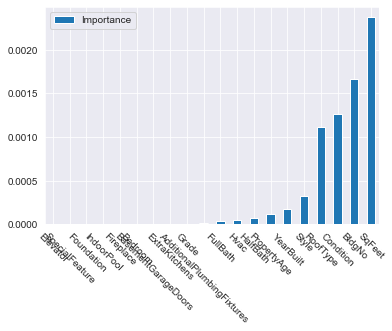

In [218]:
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
plt.figure(figsize=(20,16))
importances.sort_values(by='Importance').plot(kind='bar', rot=-45)
plt.show()

#### Many features had zero importance.  It is worth noting that no feature was overwhelmingly important, however, the top four features in descending order are: SqFeet, BldgNo, Condition, and RoofType.  In the future,  it may be a good idea to replicate the modeling process with only those four features.  

#### Not only has this process highlighted a much smaller set of important features, it has also demonstrated the role that machine learning can play in automating the real estate appraisal process.  This process is replicable, scientfically sound and more relevant than using a human appraiser to take photos of a few nearby homes with similar characteristics.  This model can be uploaded to a Flask app and real estate professionals, and interested consumers, could enter the relevant feature information and receive a predicted appraisal on the spot.  